# An introduction to neural networks with Keras
Florent Martin (Regensburg Universität)  
March 2018

Neural networks are models used in machine learning.

Machine learning =  Models which learn to solve a problem using many instances of this problem with the solution. 
Keras = Python Library for Neural networks

Plan for the talk:
1. Logistic regression
1. Gradient descent 
1. Neural networks

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set()
plt.rc('axes',titlesize='xx-large')
plt.rc('axes',labelsize='x-large')
plt.rc('legend',fontsize='x-large')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# (Section 1) Before neural networks: Logistic regression

# 1.1 The iris dataset

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


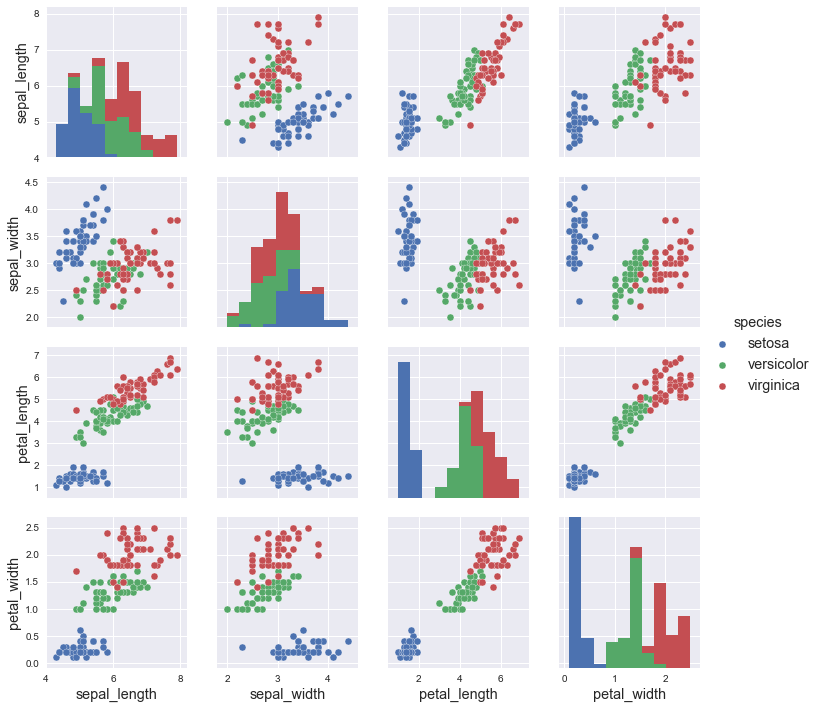

In [4]:
sns.pairplot(iris, hue="species");

### Goal: knowing the petal width, predict if the iris is a virginica

# 1.2 Logistic regression

In [5]:
iris['isVirginica'] = (iris['species'] == 'virginica').apply(int)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


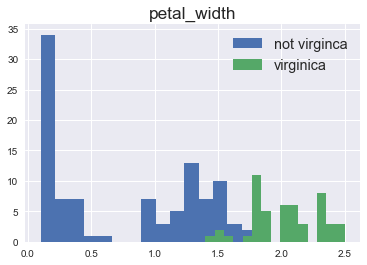

In [6]:
fig, ax = plt.subplots()
iris.groupby('isVirginica').hist(column='petal_width', ax=ax, bins=15);
plt.legend(['not virginca', 'virginica']);

<font size=4>
The **logistic regression** algorithm searches for a function 
$$ P: [0,3] \to [0,1]$$
If $x = $ petal width, $P(x)$ is an estimate (= a guess) of the probability that the plant is a virginica.  
</font>
* P(x)>0.5 answer yes (the plant is a virginica)
* P(x)$\leq$ 0.5 answer no 

<font size=4>
The idea of logistic regression is to look for a function depending on paramters $W$ and $B$:  
<br>
$$P_{W,B}(x) = \sigma(Wx+B)$$
where 
$$\sigma : \mathbb{R} \to [0,1]$$ is the **sigmoid function ** defined by 
$$ \sigma(x) = \frac{1}{1+e^{-x}}$$
We call $W$ the **weight** and $B$  the **bias**.
</font>

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

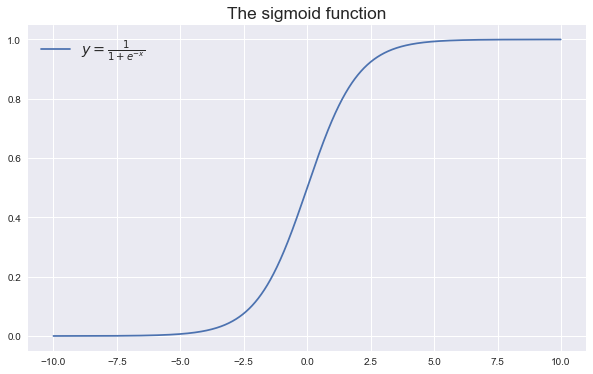

In [15]:
plt.figure(figsize=(10,6))
x = np.arange(-10, 10, .01)
plt.plot(x, sigmoid(x),label=r'$y=\frac{1}{1+e^{-x}}$')
plt.legend()
plt.title('The sigmoid function');

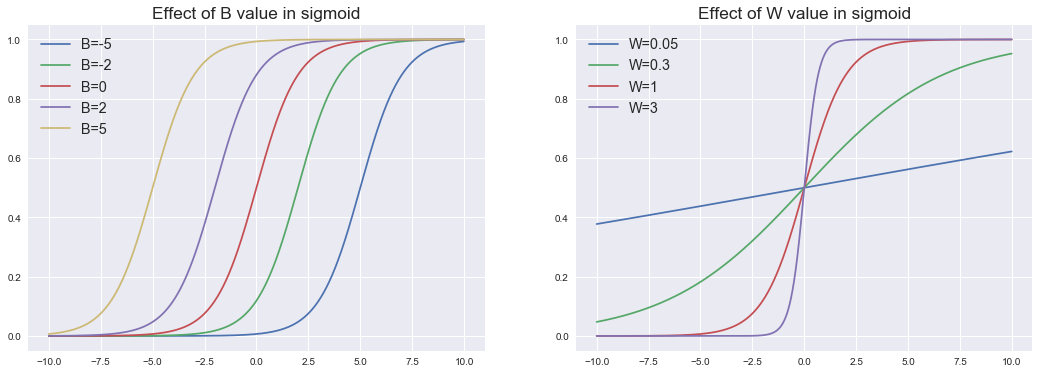

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
ax1.set_title('Effect of B value in sigmoid')
for b in [-5, -2, 0, 2, 5]:
    ax1.plot(x, sigmoid(x + b),label='B={}'.format(b))
    ax1.legend()
ax2.set_title('Effect of W value in sigmoid')
for w in [0.05, 0.3, 1, 3]:
    ax2.plot(x, sigmoid(w*x),label='W={}'.format(w))
    ax2.legend()

## 1.3 Scikit-learn

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(iris[['petal_width']], iris['isVirginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
model.coef_ , model.intercept_

(array([[2.61789264]]), array([-4.22209186]))

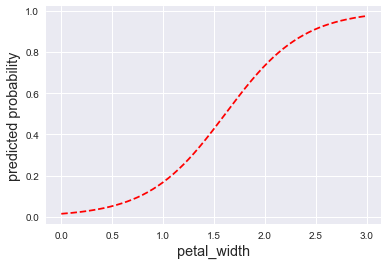

In [43]:
petal_widths = np.arange(0,3,0.01)
predicted_proba = model.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.plot(petal_widths, predicted_proba, 'r--')
plt.xlabel('petal_width')
plt.ylabel('predicted probability');

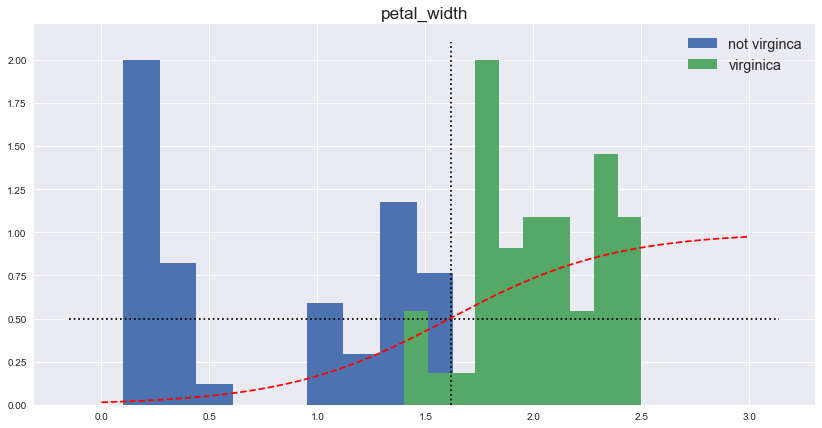

In [34]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not virginca', 'virginica'])
plt.plot(petal_widths, predicted_proba,'r--',label='predicted proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], *ax.get_ylim(), linestyles='dotted');

### How to evaluate the model?  

<font size=5>
$$ \textbf{Accuracy} = \frac{\text{number of samples correctly classified}}{\text{total number of samples}}$$
<size>

In [44]:
model.score(iris[['petal_width']], iris[['isVirginica']])

0.96

### Graphical representation of logistic regression
Choose the parameters:

* W (the weight)
* B (the bias)

![logistic regression](../reports/figures/01-log.png)

This is a (very) simple example of a neural network

# 1.4 Keras

In [47]:
from keras import regularizers, optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG

/Users/florentmartin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
model = Sequential([
    Dense(1, input_dim=1), # for the map x -> W*x + B
    Activation('sigmoid'), # for the sigmoid function
])

In [50]:
model.compile(optimizer='sgd', 
                    metrics=['accuracy'],
                    loss='binary_crossentropy')

In [52]:
model.fit(iris[['petal_width']], iris[['isVirginica']], epochs=500)

Epoch 1/500
150/150 [==============================] - 0s 104us/step - loss: 0.3612 - acc: 0.9467
Epoch 2/500
150/150 [==============================] - 0s 69us/step - loss: 0.3610 - acc: 0.9467
Epoch 3/500
150/150 [==============================] - 0s 69us/step - loss: 0.3608 - acc: 0.9467
Epoch 4/500
150/150 [==============================] - 0s 71us/step - loss: 0.3606 - acc: 0.9467
Epoch 5/500
150/150 [==============================] - 0s 69us/step - loss: 0.3603 - acc: 0.9467
Epoch 6/500
150/150 [==============================] - 0s 74us/step - loss: 0.3601 - acc: 0.9467
Epoch 7/500
150/150 [==============================] - 0s 64us/step - loss: 0.3599 - acc: 0.9467
Epoch 8/500
150/150 [==============================] - 0s 69us/step - loss: 0.3597 - acc: 0.9467
Epoch 9/500
150/150 [==============================] - 0s 77us/step - loss: 0.3595 - acc: 0.9467
Epoch 10/500
150/150 [==============================] - 0s 78us/step - loss: 0.3593 - acc: 0.9467
Epoch 11/500
150/150 [======

150/150 [==============================] - 0s 63us/step - loss: 0.3448 - acc: 0.9467
Epoch 84/500
150/150 [==============================] - 0s 110us/step - loss: 0.3446 - acc: 0.9400
Epoch 85/500
150/150 [==============================] - 0s 63us/step - loss: 0.3445 - acc: 0.9467
Epoch 86/500
150/150 [==============================] - 0s 61us/step - loss: 0.3442 - acc: 0.9533
Epoch 87/500
150/150 [==============================] - 0s 60us/step - loss: 0.3442 - acc: 0.9400
Epoch 88/500
150/150 [==============================] - 0s 64us/step - loss: 0.3438 - acc: 0.9467
Epoch 89/500
150/150 [==============================] - 0s 77us/step - loss: 0.3437 - acc: 0.9467
Epoch 90/500
150/150 [==============================] - 0s 73us/step - loss: 0.3435 - acc: 0.9467
Epoch 91/500
150/150 [==============================] - 0s 84us/step - loss: 0.3433 - acc: 0.9467
Epoch 92/500
150/150 [==============================] - 0s 72us/step - loss: 0.3431 - acc: 0.9467
Epoch 93/500
150/150 [==========

150/150 [==============================] - 0s 76us/step - loss: 0.3311 - acc: 0.9467
Epoch 165/500
150/150 [==============================] - 0s 90us/step - loss: 0.3310 - acc: 0.9467
Epoch 166/500
150/150 [==============================] - 0s 71us/step - loss: 0.3308 - acc: 0.9533
Epoch 167/500
150/150 [==============================] - 0s 71us/step - loss: 0.3307 - acc: 0.9467
Epoch 168/500
150/150 [==============================] - 0s 84us/step - loss: 0.3305 - acc: 0.9467
Epoch 169/500
150/150 [==============================] - 0s 68us/step - loss: 0.3304 - acc: 0.9533
Epoch 170/500
150/150 [==============================] - 0s 72us/step - loss: 0.3303 - acc: 0.9467
Epoch 171/500
150/150 [==============================] - 0s 74us/step - loss: 0.3301 - acc: 0.9600
Epoch 172/500
150/150 [==============================] - 0s 82us/step - loss: 0.3300 - acc: 0.9533
Epoch 173/500
150/150 [==============================] - 0s 76us/step - loss: 0.3298 - acc: 0.9600
Epoch 174/500
150/150 [=

Epoch 246/500
150/150 [==============================] - 0s 86us/step - loss: 0.3194 - acc: 0.9533
Epoch 247/500
150/150 [==============================] - 0s 64us/step - loss: 0.3192 - acc: 0.9600
Epoch 248/500
150/150 [==============================] - 0s 61us/step - loss: 0.3191 - acc: 0.9533
Epoch 249/500
150/150 [==============================] - 0s 76us/step - loss: 0.3190 - acc: 0.9600
Epoch 250/500
150/150 [==============================] - 0s 65us/step - loss: 0.3189 - acc: 0.9600
Epoch 251/500
150/150 [==============================] - ETA: 0s - loss: 0.3059 - acc: 0.937 - 0s 73us/step - loss: 0.3187 - acc: 0.9467
Epoch 252/500
150/150 [==============================] - 0s 88us/step - loss: 0.3186 - acc: 0.9600
Epoch 253/500
150/150 [==============================] - 0s 76us/step - loss: 0.3185 - acc: 0.9667
Epoch 254/500
150/150 [==============================] - 0s 71us/step - loss: 0.3183 - acc: 0.9600
Epoch 255/500
150/150 [==============================] - 0s 77us/step -

150/150 [==============================] - 0s 83us/step - loss: 0.3095 - acc: 0.9600
Epoch 327/500
150/150 [==============================] - 0s 79us/step - loss: 0.3094 - acc: 0.9600
Epoch 328/500
150/150 [==============================] - 0s 78us/step - loss: 0.3093 - acc: 0.9600
Epoch 329/500
150/150 [==============================] - 0s 104us/step - loss: 0.3091 - acc: 0.9600
Epoch 330/500
150/150 [==============================] - 0s 76us/step - loss: 0.3091 - acc: 0.9600
Epoch 331/500
150/150 [==============================] - 0s 62us/step - loss: 0.3089 - acc: 0.9600
Epoch 332/500
150/150 [==============================] - 0s 70us/step - loss: 0.3088 - acc: 0.9600
Epoch 333/500
150/150 [==============================] - 0s 69us/step - loss: 0.3087 - acc: 0.9600
Epoch 334/500
150/150 [==============================] - 0s 77us/step - loss: 0.3085 - acc: 0.9600
Epoch 335/500
150/150 [==============================] - 0s 71us/step - loss: 0.3085 - acc: 0.9600
Epoch 336/500
150/150 [

150/150 [==============================] - 0s 96us/step - loss: 0.3006 - acc: 0.9600
Epoch 409/500
150/150 [==============================] - 0s 64us/step - loss: 0.3005 - acc: 0.9600
Epoch 410/500
150/150 [==============================] - 0s 86us/step - loss: 0.3004 - acc: 0.9600
Epoch 411/500
150/150 [==============================] - 0s 74us/step - loss: 0.3002 - acc: 0.9600
Epoch 412/500
150/150 [==============================] - 0s 65us/step - loss: 0.3001 - acc: 0.9600
Epoch 413/500
150/150 [==============================] - 0s 70us/step - loss: 0.3000 - acc: 0.9600
Epoch 414/500
150/150 [==============================] - 0s 73us/step - loss: 0.2999 - acc: 0.9600
Epoch 415/500
150/150 [==============================] - 0s 73us/step - loss: 0.2999 - acc: 0.9600
Epoch 416/500
150/150 [==============================] - 0s 72us/step - loss: 0.2997 - acc: 0.9600
Epoch 417/500
150/150 [==============================] - 0s 69us/step - loss: 0.2997 - acc: 0.9600
Epoch 418/500
150/150 [=

150/150 [==============================] - ETA: 0s - loss: 0.2739 - acc: 1.000 - 0s 73us/step - loss: 0.2926 - acc: 0.9600
Epoch 491/500
150/150 [==============================] - 0s 82us/step - loss: 0.2926 - acc: 0.9600
Epoch 492/500
150/150 [==============================] - 0s 77us/step - loss: 0.2925 - acc: 0.9600
Epoch 493/500
150/150 [==============================] - 0s 72us/step - loss: 0.2924 - acc: 0.9600
Epoch 494/500
150/150 [==============================] - 0s 74us/step - loss: 0.2923 - acc: 0.9600
Epoch 495/500
150/150 [==============================] - 0s 67us/step - loss: 0.2922 - acc: 0.9600
Epoch 496/500
150/150 [==============================] - 0s 73us/step - loss: 0.2921 - acc: 0.9600
Epoch 497/500
150/150 [==============================] - 0s 74us/step - loss: 0.2920 - acc: 0.9600
Epoch 498/500
150/150 [==============================] - 0s 75us/step - loss: 0.2919 - acc: 0.9600
Epoch 499/500
150/150 [==============================] - 0s 89us/step - loss: 0.2918 

In [53]:
model.metrics_names

['loss', 'acc']

In [54]:
model.evaluate(iris[['petal_width']], iris[['isVirginica']])

150/150 [==============================] - 0s 140us/step


[0.29165743112564085, 0.9600000015894572]

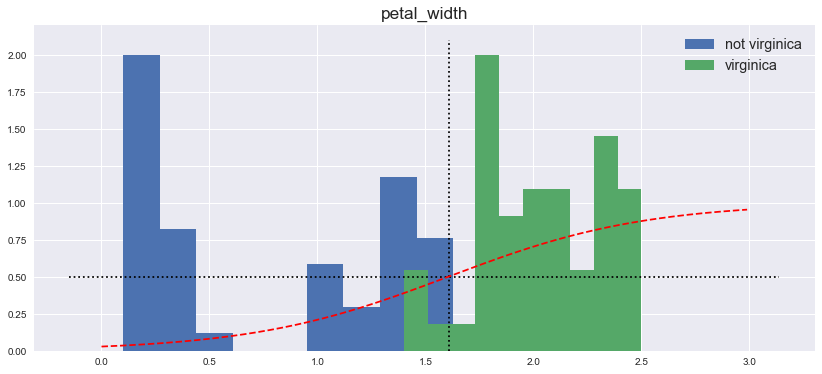

In [61]:
fig, ax = plt.subplots(figsize=(14,6))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not virginica', 'virginica'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], \
           *ax.get_ylim(), linestyles='dotted');

# (Section 2) Gradient descent

## How does this work? 

# 2.1 Optimization, gradient descent with Keras

In [81]:
model = Sequential([
    Dense(1,input_dim=1, kernel_regularizer=regularizers.l2(.1)),
    Activation('sigmoid'), 
])

In [82]:
model.compile(optimizer='sgd', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
x_grid, y_grid = np.mgrid[-10:10:.1,-10:10:.1]

In [84]:
def get_accuracy(weight,bias):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    accuracy = model.evaluate(iris[['petal_width']], \
                              iris[['isVirginica']],verbose=0)[1]
    return accuracy

In [85]:
vaccuracy = np.vectorize(get_accuracy)

In [86]:
#takes two minutes to run
acc_grid = vaccuracy(x_grid,y_grid)

KeyboardInterrupt: 

In [87]:
import pickle
with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)

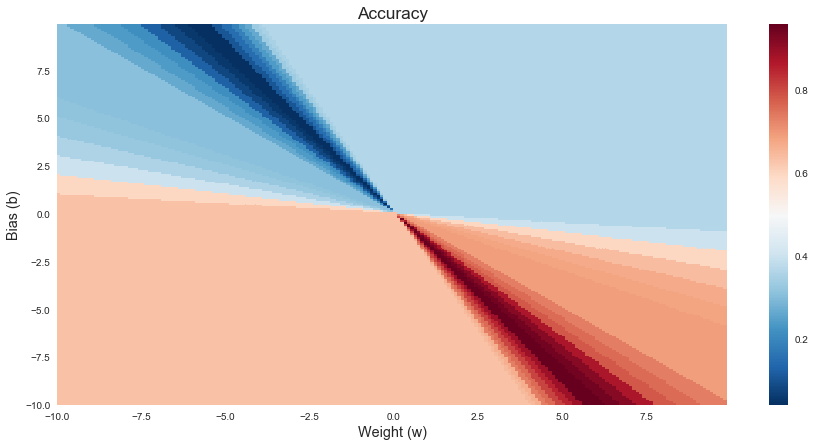

In [88]:
fig,ax_acc = plt.subplots(figsize=(15,7))
plt.pcolor(x_grid , y_grid , acc_grid , cmap='RdBu_r')
plt.colorbar()
plt.title('Accuracy',)
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)');

## Problem: the accuracy is constant on huge zones

# 2.2 The cross entropy  loss function

<font size=6>
Fix the weigth $W$ and bias $B$. 
<br><br><br>
$$\mathcal{L}(p,y) := y \log(p) + (1-y)\log(1-p)$$
 <br>
$$\text{Loss} :=\sum_{i=1}^n \mathcal{L}(p_i,y_i) = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
<br>
where </font>

*  <font size=4>$y_i\in \{0,1\}$ is the class of the i-th sample</font>

*  <font size=4>$p_i \in [0,1]$ is the predicted probability $P_{w,b}(x_i)$ calculated by the logistic regression model for parameter values $w$ and $b$</font>

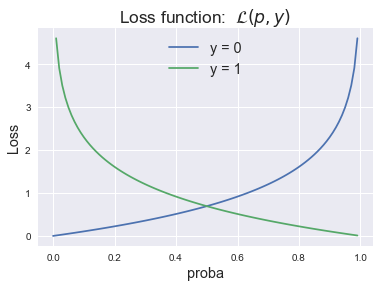

In [102]:
probas = np.arange(0,1,.01)
loss0 = -np.log(1-probas)
loss1 = - np.log(probas)
plt.plot(probas,loss0,label='y = 0')
plt.plot(probas,loss1,label='y = 1')
plt.xlabel('proba')
plt.ylabel('Loss')
plt.title('Loss function:  $\mathcal{L}(p,y)$')
plt.legend();

In [103]:
def get_loss(weight,bias):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    loss = model.evaluate(iris[['petal_width']], iris[['isVirginica']], \
                          verbose=0)[0]
    return loss
vloss = np.vectorize(get_loss)

In [91]:
loss_grid = vloss(x_grid,y_grid) 

KeyboardInterrupt: 

In [92]:
import pickle
with open('../data/loss_grid', 'rb') as f:
    loss_grid =pickle.load(f)

In [104]:
model.layers[0].set_weights( [ np.array([[9]]) , np.array([9]) ] ) 

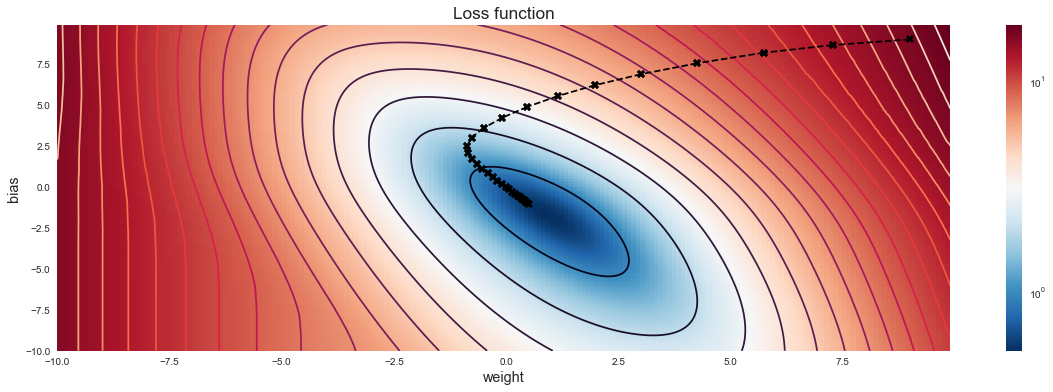

In [105]:
fig , ax_loss = plt.subplots(figsize=(20,6))
plt.pcolor(x_grid , y_grid , loss_grid , norm=colors.LogNorm() , cmap='RdBu_r')
plt.colorbar()
contour = plt.contour(x_grid, y_grid, loss_grid,20)
plt.title('Loss function'); plt.xlabel('weight'); plt.ylabel('bias');
for i in range(30):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(iris[['petal_width']], iris[['isVirginica']], epochs=20, verbose=0)
    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    plt.plot([old_weight,weight],[old_bias,bias],'kX--',markersize=8)

# (Section 3) Neural Networks: when linear methods are not sufficient

# 3.1 Versicolor

In [106]:
iris['isVersicolor'] = (iris['species'] == 'versicolor').apply(int)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica,isVersicolor
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


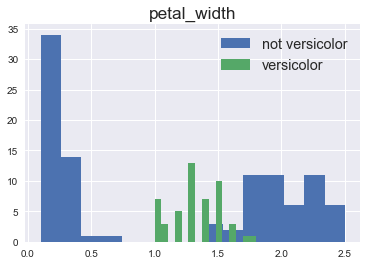

In [108]:
fig, ax = plt.subplots()
iris.groupby('isVersicolor').hist(column='petal_width', ax=ax, bins=15);
plt.legend(['not versicolor', 'versicolor']);

## Goal: determine if an iris is a versicolor knowing its petal width

# 3.2 Let's try  logistic regression

In [109]:
model = Sequential([
    Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)),
    Activation('sigmoid'),
])

In [110]:
model.compile(optimizer=optimizers.SGD(lr=0.05), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
model.fit(iris[['petal_width']], iris[['isVersicolor']], epochs=500)

Epoch 1/500
150/150 [==============================] - 0s 615us/step - loss: 0.7722 - acc: 0.3733
Epoch 2/500
150/150 [==============================] - 0s 75us/step - loss: 0.7314 - acc: 0.6067
Epoch 3/500
150/150 [==============================] - 0s 80us/step - loss: 0.7040 - acc: 0.6400
Epoch 4/500
150/150 [==============================] - 0s 75us/step - loss: 0.6842 - acc: 0.4267
Epoch 5/500
150/150 [==============================] - 0s 73us/step - loss: 0.6726 - acc: 0.6667
Epoch 6/500
150/150 [==============================] - 0s 78us/step - loss: 0.6647 - acc: 0.6667
Epoch 7/500
150/150 [==============================] - 0s 78us/step - loss: 0.6591 - acc: 0.6667
Epoch 8/500
150/150 [==============================] - 0s 74us/step - loss: 0.6549 - acc: 0.6667
Epoch 9/500
150/150 [==============================] - 0s 84us/step - loss: 0.6520 - acc: 0.6667
Epoch 10/500
150/150 [==============================] - 0s 110us/step - loss: 0.6502 - acc: 0.6667
Epoch 11/500
150/150 [=====

150/150 [==============================] - 0s 82us/step - loss: 0.6347 - acc: 0.6667
Epoch 84/500
150/150 [==============================] - 0s 76us/step - loss: 0.6354 - acc: 0.6667
Epoch 85/500
150/150 [==============================] - 0s 97us/step - loss: 0.6347 - acc: 0.6667
Epoch 86/500
150/150 [==============================] - 0s 82us/step - loss: 0.6346 - acc: 0.6667
Epoch 87/500
150/150 [==============================] - 0s 82us/step - loss: 0.6347 - acc: 0.6667
Epoch 88/500
150/150 [==============================] - 0s 88us/step - loss: 0.6344 - acc: 0.6667
Epoch 89/500
150/150 [==============================] - 0s 80us/step - loss: 0.6347 - acc: 0.6667
Epoch 90/500
150/150 [==============================] - 0s 87us/step - loss: 0.6348 - acc: 0.6667
Epoch 91/500
150/150 [==============================] - 0s 79us/step - loss: 0.6345 - acc: 0.6667
Epoch 92/500
150/150 [==============================] - 0s 84us/step - loss: 0.6346 - acc: 0.6667
Epoch 93/500
150/150 [===========

150/150 [==============================] - 0s 73us/step - loss: 0.6348 - acc: 0.6667
Epoch 166/500
150/150 [==============================] - 0s 82us/step - loss: 0.6342 - acc: 0.6667
Epoch 167/500
150/150 [==============================] - 0s 71us/step - loss: 0.6343 - acc: 0.6667
Epoch 168/500
150/150 [==============================] - 0s 77us/step - loss: 0.6341 - acc: 0.6667
Epoch 169/500
150/150 [==============================] - 0s 84us/step - loss: 0.6348 - acc: 0.6667
Epoch 170/500
150/150 [==============================] - 0s 89us/step - loss: 0.6340 - acc: 0.6667
Epoch 171/500
150/150 [==============================] - 0s 89us/step - loss: 0.6343 - acc: 0.6667
Epoch 172/500
150/150 [==============================] - 0s 74us/step - loss: 0.6340 - acc: 0.6667
Epoch 173/500
150/150 [==============================] - 0s 90us/step - loss: 0.6343 - acc: 0.6667
Epoch 174/500
150/150 [==============================] - 0s 78us/step - loss: 0.6344 - acc: 0.6667
Epoch 175/500
150/150 [=

150/150 [==============================] - 0s 82us/step - loss: 0.6340 - acc: 0.6667
Epoch 247/500
150/150 [==============================] - 0s 88us/step - loss: 0.6341 - acc: 0.6667
Epoch 248/500
150/150 [==============================] - 0s 79us/step - loss: 0.6340 - acc: 0.6667
Epoch 249/500
150/150 [==============================] - 0s 80us/step - loss: 0.6344 - acc: 0.6667
Epoch 250/500
150/150 [==============================] - 0s 77us/step - loss: 0.6340 - acc: 0.6667
Epoch 251/500
150/150 [==============================] - 0s 76us/step - loss: 0.6342 - acc: 0.6667
Epoch 252/500
150/150 [==============================] - 0s 75us/step - loss: 0.6344 - acc: 0.6667
Epoch 253/500
150/150 [==============================] - 0s 85us/step - loss: 0.6343 - acc: 0.6667
Epoch 254/500
150/150 [==============================] - 0s 76us/step - loss: 0.6340 - acc: 0.6667
Epoch 255/500
150/150 [==============================] - 0s 77us/step - loss: 0.6344 - acc: 0.6667
Epoch 256/500
150/150 [=

150/150 [==============================] - 0s 77us/step - loss: 0.6340 - acc: 0.6667
Epoch 328/500
150/150 [==============================] - 0s 91us/step - loss: 0.6339 - acc: 0.6667
Epoch 329/500
150/150 [==============================] - 0s 74us/step - loss: 0.6343 - acc: 0.6667
Epoch 330/500
150/150 [==============================] - 0s 84us/step - loss: 0.6339 - acc: 0.6667
Epoch 331/500
150/150 [==============================] - 0s 79us/step - loss: 0.6345 - acc: 0.6667
Epoch 332/500
150/150 [==============================] - 0s 80us/step - loss: 0.6339 - acc: 0.6667
Epoch 333/500
150/150 [==============================] - 0s 92us/step - loss: 0.6340 - acc: 0.6667
Epoch 334/500
150/150 [==============================] - 0s 92us/step - loss: 0.6345 - acc: 0.6667
Epoch 335/500
150/150 [==============================] - 0s 82us/step - loss: 0.6340 - acc: 0.6667
Epoch 336/500
150/150 [==============================] - 0s 80us/step - loss: 0.6342 - acc: 0.6667
Epoch 337/500
150/150 [=

150/150 [==============================] - 0s 92us/step - loss: 0.6340 - acc: 0.6667
Epoch 408/500
150/150 [==============================] - 0s 76us/step - loss: 0.6343 - acc: 0.6667
Epoch 409/500
150/150 [==============================] - 0s 76us/step - loss: 0.6340 - acc: 0.6667
Epoch 410/500
150/150 [==============================] - ETA: 0s - loss: 0.7069 - acc: 0.562 - 0s 79us/step - loss: 0.6340 - acc: 0.6667
Epoch 411/500
150/150 [==============================] - 0s 81us/step - loss: 0.6341 - acc: 0.6667
Epoch 412/500
150/150 [==============================] - 0s 74us/step - loss: 0.6343 - acc: 0.6667
Epoch 413/500
150/150 [==============================] - 0s 88us/step - loss: 0.6342 - acc: 0.6667
Epoch 414/500
150/150 [==============================] - 0s 71us/step - loss: 0.6341 - acc: 0.6667
Epoch 415/500
150/150 [==============================] - 0s 74us/step - loss: 0.6341 - acc: 0.6667
Epoch 416/500
150/150 [==============================] - 0s 95us/step - loss: 0.6341 

150/150 [==============================] - 0s 76us/step - loss: 0.6340 - acc: 0.6667
Epoch 488/500
150/150 [==============================] - 0s 82us/step - loss: 0.6342 - acc: 0.6667
Epoch 489/500
150/150 [==============================] - 0s 81us/step - loss: 0.6345 - acc: 0.6667
Epoch 490/500
150/150 [==============================] - 0s 69us/step - loss: 0.6343 - acc: 0.6667
Epoch 491/500
150/150 [==============================] - 0s 73us/step - loss: 0.6345 - acc: 0.6667
Epoch 492/500
150/150 [==============================] - 0s 69us/step - loss: 0.6349 - acc: 0.6667
Epoch 493/500
150/150 [==============================] - 0s 72us/step - loss: 0.6346 - acc: 0.6667
Epoch 494/500
150/150 [==============================] - 0s 84us/step - loss: 0.6343 - acc: 0.6667
Epoch 495/500
150/150 [==============================] - 0s 81us/step - loss: 0.6340 - acc: 0.6667
Epoch 496/500
150/150 [==============================] - 0s 104us/step - loss: 0.6347 - acc: 0.6667
Epoch 497/500
150/150 [

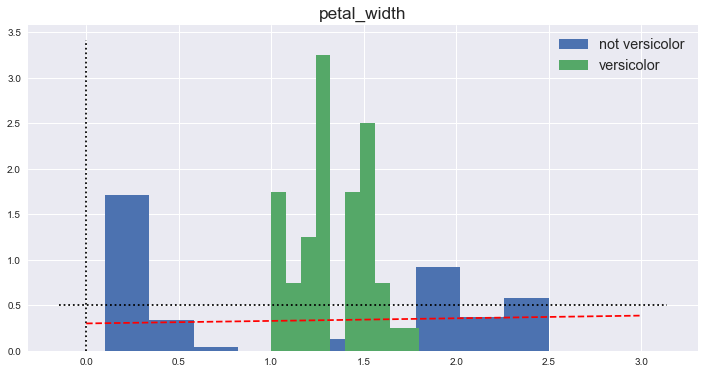

In [113]:
fig, ax = plt.subplots(figsize=(12,6))
iris.groupby('isVersicolor').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], *ax.get_ylim(), linestyles='dotted');

## BAD NEWS: PREDICTED PROBAS BY LOGISTIC REGRESSION CAN NOT UP AND DOWN

# 3.3 Add complexity to the neural network

In [123]:
model = Sequential()
model.add(Dense(3, input_dim=1 ) )
model.add(Activation('sigmoid'))
model.add(Dense(1, input_dim=1 ) )
model.add(Activation('sigmoid'))
model.compile(optimizer=optimizers.SGD(lr=.1), loss='binary_crossentropy')

![NN](../reports/figures/02-hidden.png)

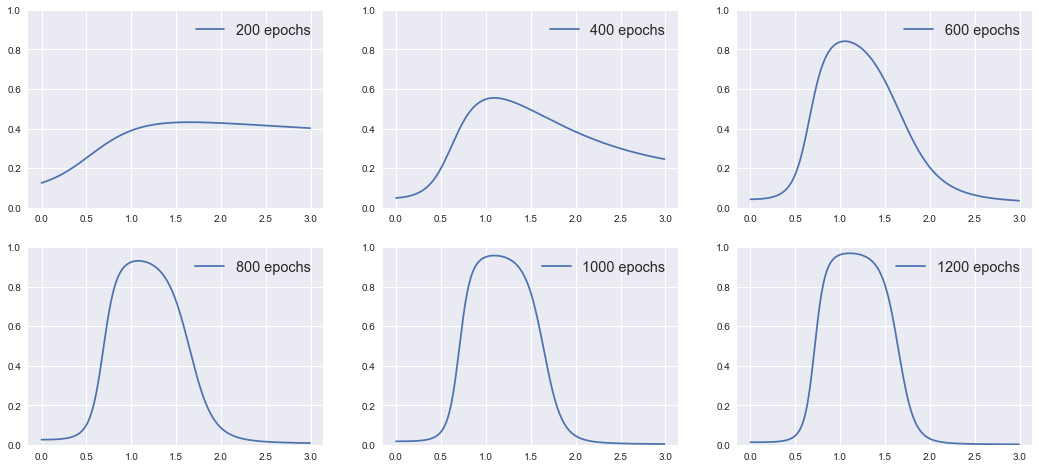

In [124]:
plt.subplots(nrows=3,ncols=3,figsize=(18,8),sharex=True,sharey=True)
for i in range(1,7):
    plt.subplot(2,3, i)
    model.fit(iris[['petal_width']], iris[['isVersicolor']],epochs=300,verbose=0)
    probas = model.predict(petal_widths.reshape(-1,1))[:,0]
    plt.plot(petal_widths,probas,label='{} epochs'.format(i*300))
    plt.ylim((0,1))
    plt.legend()

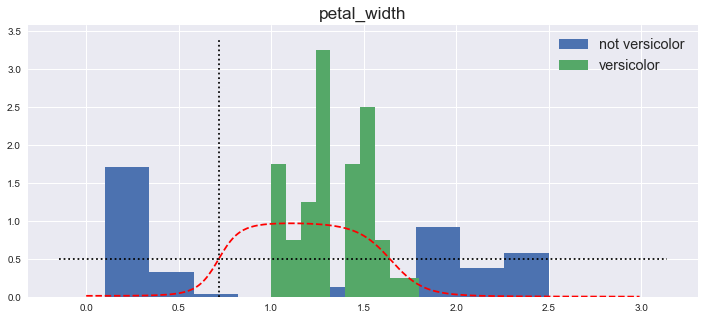

In [125]:
fig, ax = plt.subplots(figsize=(12,5))
iris.groupby('isVersicolor').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], *ax.get_ylim(), linestyles='dotted');